In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
euro = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')

In [7]:
euro.head(15)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1
5,CH,40,6,3,0,5,2,0,2,2,1,76,1
6,CH,41,6,2,4,5,3,10,5,2,2,30,1
7,CH,51,6,2,8,8,8,9,6,4,2,84,2
8,CH,53,6,4,4,4,8,7,4,2,2,62,1
9,CH,55,6,1,6,7,7,9,5,2,2,33,1


Did people become less trusting from 2012 to 2014?

In [10]:
euro_2012 = (euro[euro['year'] == 6])
euro_2014 = (euro[euro['year'] == 7])

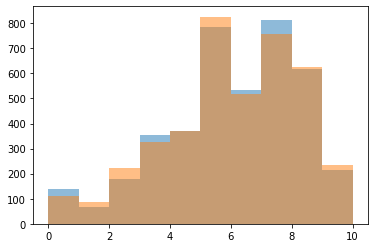

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


In [13]:
plt.hist(euro_2012['ppltrst'], alpha = 0.5)
plt.hist(euro_2014['ppltrst'], alpha = 0.5)
plt.show()
print(stats.describe(euro_2012['ppltrst']))
print(stats.describe(euro_2014['ppltrst']))

In [14]:
print(stats.ttest_ind(euro_2012['ppltrst'], euro_2014['ppltrst']))

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)


In [ ]:
#we have a very high p-value so we know we cannot reject the null hypothesis. In other words, there was no significant 
#difference in ppltrst between the years 2012 and 2014

Did people become happier from 2012 to 2014?

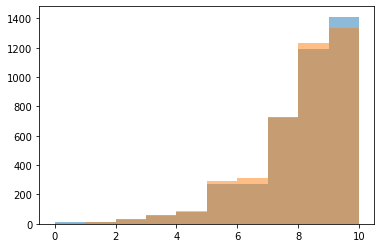

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [15]:
plt.hist(euro_2012['happy'], alpha = 0.5)
plt.hist(euro_2014['happy'], alpha = 0.5)
plt.show()
print(stats.describe(euro_2012['happy']))
print(stats.describe(euro_2014['happy']))

In [16]:
stats.mannwhitneyu(euro_2012['happy'],euro_2014['happy'])

MannwhitneyuResult(statistic=8096343.0, pvalue=0.02679503248642277)

In [17]:
#Notebook answer gives this, how do we know when to use this or the test above? Does it matter?
stats.kruskal(euro_2012['happy'], euro_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [21]:
euro_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [22]:
ger = (euro_2014[euro_2014['cntry'] == 'DE'])
spn = (euro_2014[euro_2014['cntry'] == 'ES'])
swi = (euro_2014[euro_2014['cntry'] == 'CH'])

DescribeResult(nobs=14, minmax=(3, 6), mean=4.428571428571429, variance=0.5714285714285714, skewness=0.24891663306000175, kurtosis=-0.20118343195266197)
DescribeResult(nobs=1134, minmax=(1, 7), mean=5.263668430335097, variance=2.067222541332574, skewness=-0.8331602682762435, kurtosis=0.2132945592754396)
DescribeResult(nobs=743, minmax=(1, 7), mean=5.174966352624495, variance=1.6944129031789972, skewness=-0.6382977240097087, kurtosis=-0.24036067403841654)


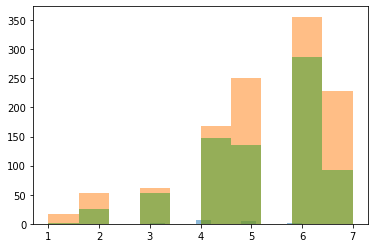

In [27]:
plt.hist(ger['sclmeet'], alpha = 0.5)
plt.hist(spn['sclmeet'], alpha = 0.5)
plt.hist(swi['sclmeet'], alpha = 0.5)
print(stats.describe(ger['sclmeet']))
print(stats.describe(spn['sclmeet']))
print(stats.describe(swi['sclmeet']))

In [28]:
stats.kruskal(ger['sclmeet'],spn['sclmeet'],swi['sclmeet'])

KruskalResult(statistic=12.398774136896987, pvalue=0.0020306749196556226)

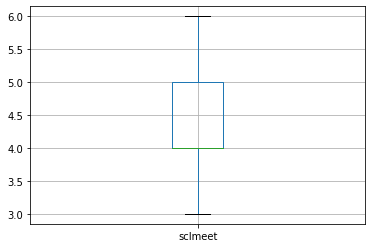

In [35]:
ger.boxplot('sclmeet')

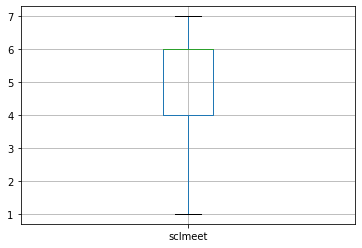

In [36]:
spn.boxplot('sclmeet')

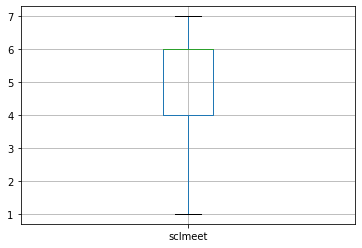

In [37]:
swi.boxplot('sclmeet')

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

DescribeResult(nobs=14, minmax=(1, 4), mean=2.7142857142857144, variance=0.5274725274725275, skewness=-0.7909810627737351, kurtosis=0.6354166666666665)
DescribeResult(nobs=1134, minmax=(1, 5), mean=2.631393298059965, variance=0.9037267419144442, skewness=0.05248738196690647, kurtosis=-0.25954410283656104)
DescribeResult(nobs=743, minmax=(1, 5), mean=2.784656796769852, variance=0.821489336230696, skewness=0.056518838123621226, kurtosis=-0.05699247701187771)


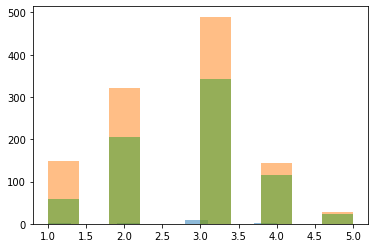

In [38]:
plt.hist(ger['sclact'], alpha = 0.5)
plt.hist(spn['sclact'], alpha = 0.5)
plt.hist(swi['sclact'], alpha = 0.5)
print(stats.describe(ger['sclact']))
print(stats.describe(spn['sclact']))
print(stats.describe(swi['sclact']))

In [39]:
stats.kruskal(ger['sclact'],spn['sclact'],swi['sclact'])

KruskalResult(statistic=11.156562904978014, pvalue=0.003779054426025241)

In [42]:
ruff = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv')
ruff.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


Is there a significant difference in the number of unique designs drawn by the same participants from measurement 2 to measurement 3?

In [44]:
r_unique = ruff.pivot(index='Casenr', columns='Measurement', values='Unique')
r_unique

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0
...,...,...,...
2511,84.0,95.0,90.5
2512,91.0,50.0,92.0
2513,73.0,62.0,54.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


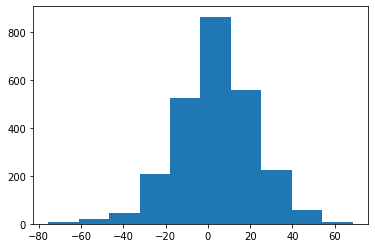

In [45]:
plt.hist(r_unique['Measurement 3 (2008-2012)'] - r_unique['Measurement 2 (2006-2008)'])
print(stats.describe(r_unique['Measurement 3 (2008-2012)'] - r_unique['Measurement 2 (2006-2008)']))

In [46]:
#data above is normal, can perform ttest
stats.ttest_ind(r_unique['Measurement 3 (2008-2012)'], r_unique['Measurement 2 (2006-2008)'])

Ttest_indResult(statistic=5.172289431795646, pvalue=2.4021740879907784e-07)

In [47]:
#answer notebook uses following code:
#stats.ttest_rel(rfft_unique['Measurement 3 (2008-2012)'], rfft_unique['Measurement 2 (2006-2008)'])
#why do they use stats.ttest_rel instead of ttest_ind?

Is there a significant difference in the number of perseverative errors drawn by the same participants from measurement 2 to measurement 3?

In [48]:
r_per = ruff.pivot(index='Casenr', columns='Measurement', values='Perseverative')
r_per.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

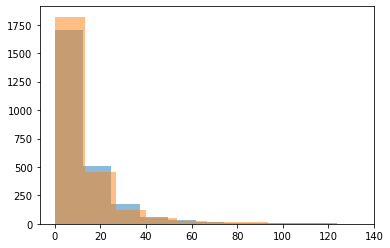

In [49]:
plt.hist(r_per['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(r_per['Measurement 2 (2006-2008)'], alpha = .5)

In [50]:
stats.wilcoxon(r_per['Measurement 3 (2008-2012)'], r_per['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)